In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [60]:
# Disable Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

# Train-Test Split
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.model_selection import cross_val_score, learning_curve

In [2]:
DATA_DIR = "/home/arseniy/Projects/Odev_test_task/"

In [3]:
df = pd.read_csv(DATA_DIR + "Europe Hotel Booking Satisfaction Score.csv")

Age - 7 to 85

purpose_of_travel - aviation, academic, personal, business, tourism.

Type of Travel - Group travel, Personal Travel.

Type Of Booking - Group bookings, Individual/Couple.

Hotel wifi service - Ratings out of 5.

Departure/Arrival convenience - Ratings out of 5.

Ease of Online booking - Ratings out of 5.

Hotel location - Ratings out of 5.

Food and drink - Ratings out of 5.

Stay comfort - Ratings out of 5.

Common Room entertainment - Ratings out of 5.

Checkin/Checkout service - Ratings out of 5.

Other service - Ratings out of 5.

Cleanliness - Ratings out of 5.

satisfaction - satisfied, neutral or dissatisfied.

## Проверяем данные на пропуски и т.д

In [4]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [5]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [7]:
df.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.describe(include=["object", "bool"])

,Gender,purpose_of_travel,Type of Travel,Type Of Booking,satisfaction
count,103904,103904,103904,103904,103904
unique,2,5,2,3,2
top,Female,tourism,Group Travel,Group bookings,neutral or dissatisfied
freq,52727,32053,71655,49665,58879


In [9]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [10]:
df["purpose_of_travel"].value_counts()

purpose_of_travel
tourism     32053
academic    27219
business    21238
aviation    13846
personal     9548
Name: count, dtype: int64

In [11]:
df["Type of Travel"].value_counts()

Type of Travel
Group Travel       71655
Personal Travel    32249
Name: count, dtype: int64

In [12]:
df["Type Of Booking"].value_counts()

Type Of Booking
Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: count, dtype: int64

### Дропним строки с пропусками в Type Of Booking

In [13]:
x_drop = df[df['Type Of Booking'].apply(lambda x: x.startswith('Not defined'))].index
df = df.drop(x_drop)
df = df.reset_index(drop=True)
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


### Заменим категориальные признаки не числового значения, на дискретные с чиселками

In [17]:
df["satisfaction"].replace(["neutral or dissatisfied", "satisfied"], [0, 1], inplace=True)
df["purpose_of_travel"].replace(["tourism", "academic", "business", "aviation", "personal"], [0, 1, 2, 3, 4], inplace=True)
df["Type of Travel"].replace(["Group Travel", "Personal Travel"], [0, 1], inplace=True)
df["Type Of Booking"].replace(["Group bookings", "Individual/Couple"], [0, 1], inplace=True)
df["Gender"].replace(["Male", "Female"], [0, 1], inplace=True)

### Построим боксплоты, чтобы посмотреть наличие выбросов

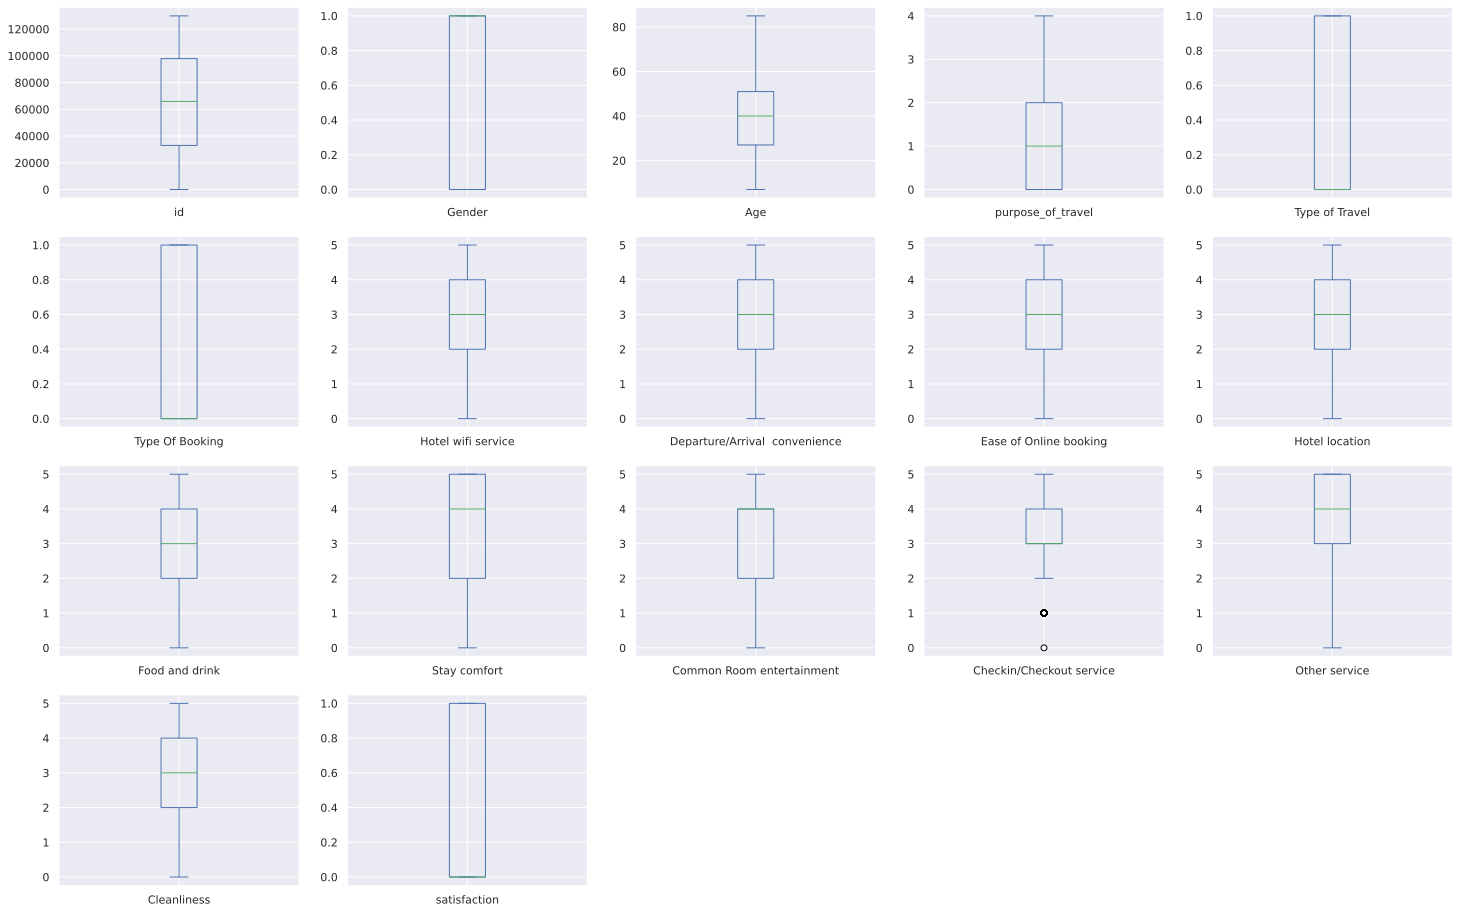

In [18]:
df.plot(kind = 'box', subplots=True, figsize=(25,20), layout = (5,5))
plt.show()

## Посмотрим корреляцию признаков с satisfaction

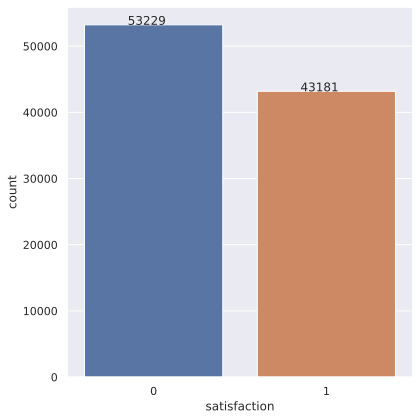

In [21]:
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="satisfaction", data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [22]:
df.satisfaction.value_counts(normalize=True)

satisfaction
0    0.552111
1    0.447889
Name: proportion, dtype: float64

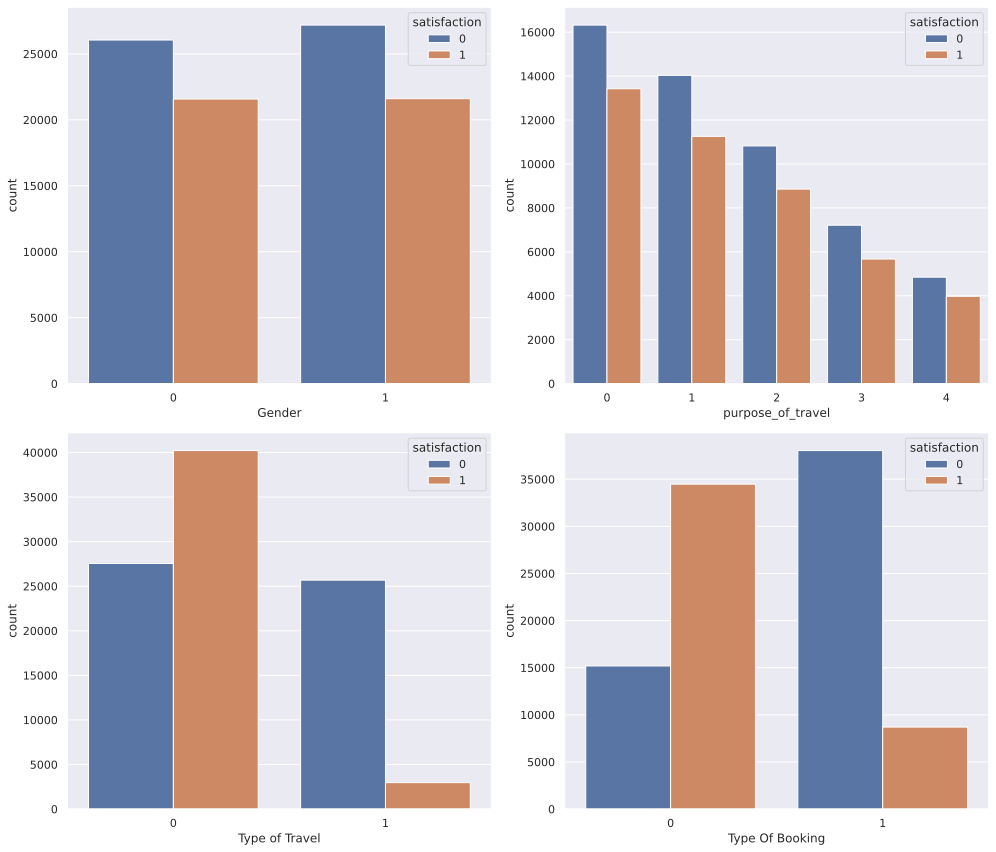

In [23]:
# sns.set(style='darkgrid')
fig, ax = plt.subplots(2,2, figsize=(14, 12))
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])
plt.tight_layout();

In [25]:
def df_countplot(df, target):
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    ax1 = sns.countplot( x = target, data = df,  ax=axes[0])

    counts = df.groupby([target, 'satisfaction']).size().to_frame('Total')
    counts = counts.reset_index()
    ax2 = sns.barplot(data=counts, y='Total', x=target, hue='satisfaction', ax=axes[1])
    plt.show()
#     return ax1

def pivot_satisfaction(df,target):
    df_rate = pd.pivot_table(
      df[['id',target,'satisfaction']],
      index       =[target],
      columns     =['satisfaction'],
      aggfunc     ="count",
      fill_value  =0,
    ).reset_index()

    df_rate.columns=[target,'neutral or dissatisfied','satisfied']

    df_rate['total'] = df_rate['neutral or dissatisfied'] + df_rate['satisfied']
    df_rate["satisfaction Rate"] = round((df_rate['satisfied']/df_rate['total'])*100,2)
    df_rate["dissatisfied Rate"] = round((df_rate['neutral or dissatisfied']/df_rate['total'])*100,2)
    return df_rate

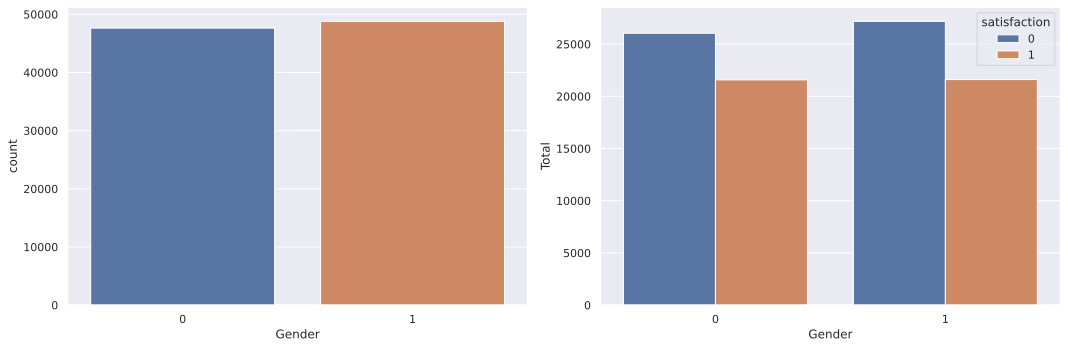

In [26]:
df_countplot(df,"Gender")

In [27]:
pivot_satisfaction(df,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,26048,21577,47625,45.31,54.69
1,1,27181,21604,48785,44.28,55.72


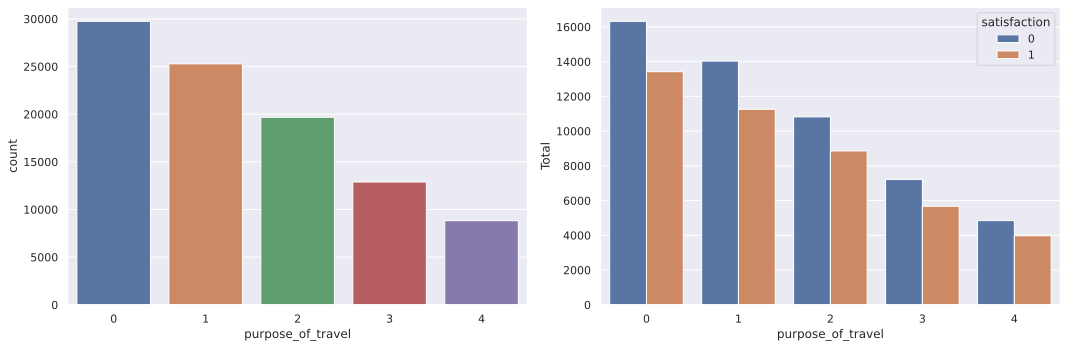

In [28]:
df_countplot(df,"purpose_of_travel")

In [29]:
pivot_satisfaction(df,"purpose_of_travel")

,purpose_of_travel,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,16320,13423,29743,45.13,54.87
1,1,14033,11256,25289,44.51,55.49
2,2,10820,8856,19676,45.01,54.99
3,3,7211,5671,12882,44.02,55.98
4,4,4845,3975,8820,45.07,54.93


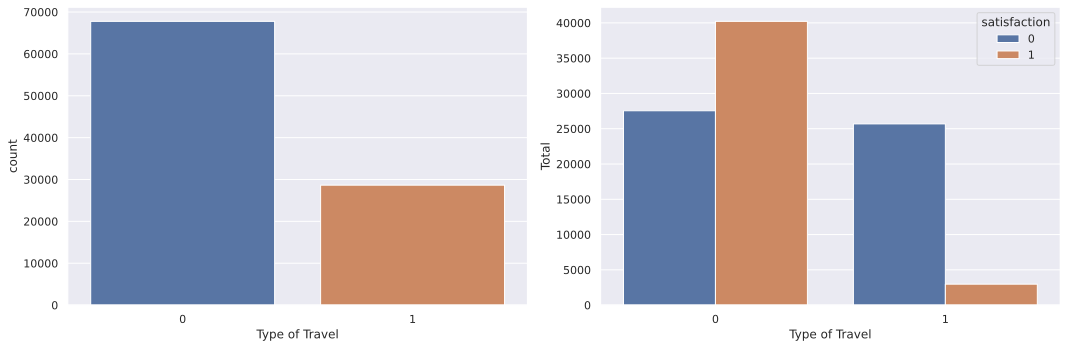

In [30]:
df_countplot(df,"Type of Travel")


In [31]:
pivot_satisfaction(df,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,27549,40216,67765,59.35,40.65
1,1,25680,2965,28645,10.35,89.65


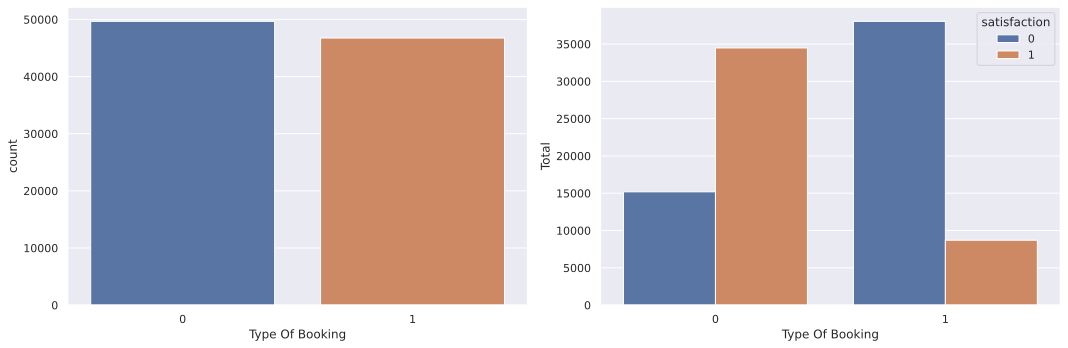

In [32]:
df_countplot(df,"Type Of Booking")

In [33]:
pivot_satisfaction(df,"Type Of Booking")

,Type Of Booking,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,15185,34480,49665,69.43,30.57
1,1,38044,8701,46745,18.61,81.39


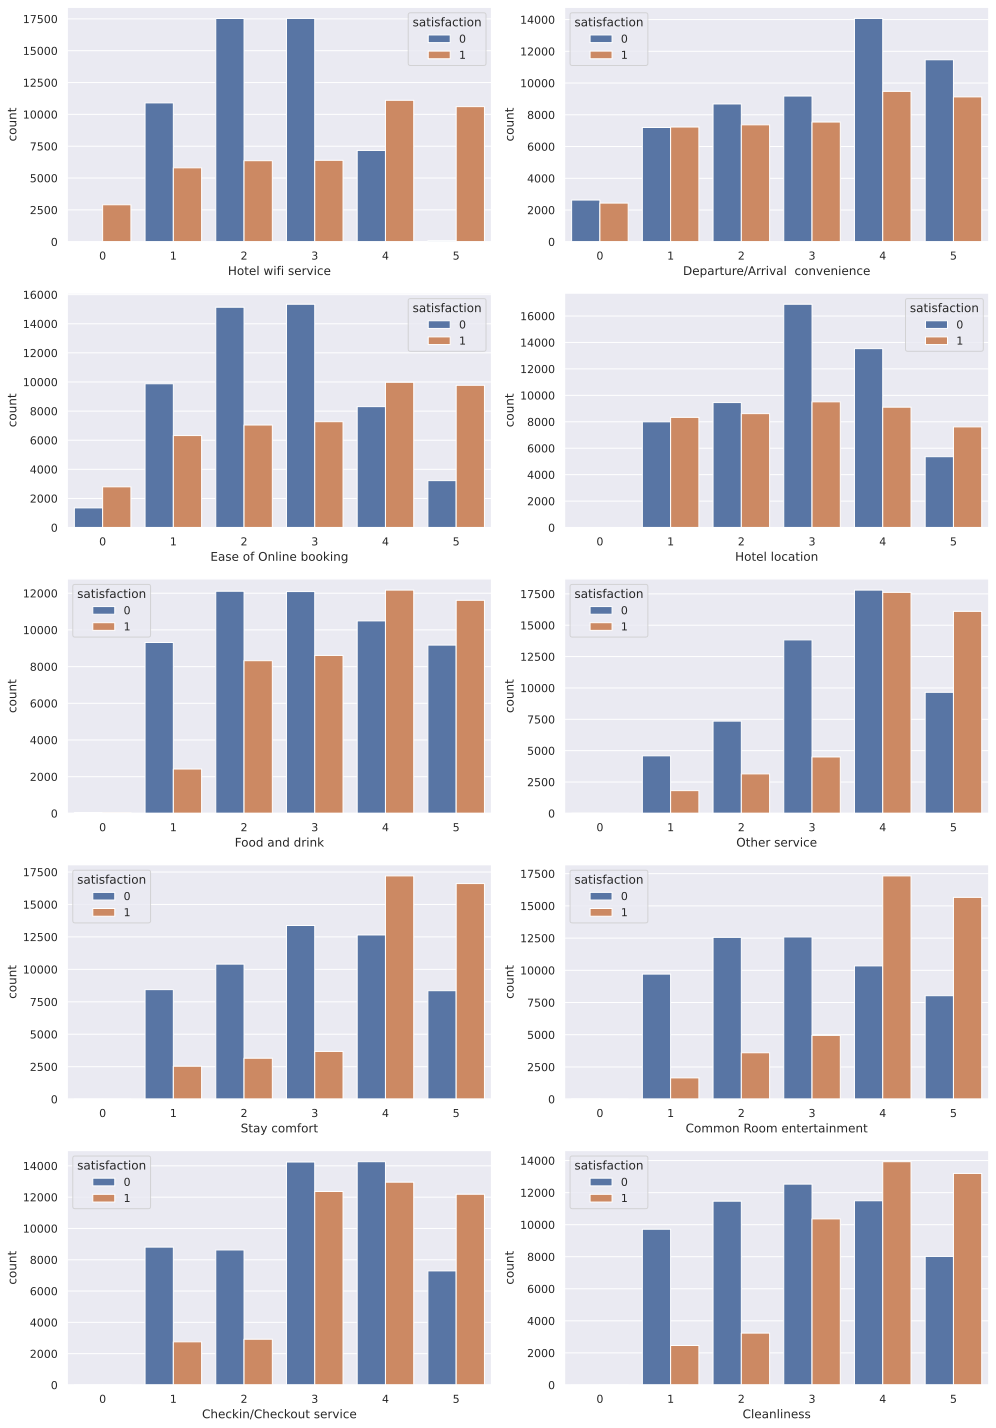

In [34]:
fig, ax = plt.subplots(5,2, figsize=(14, 20))
sns.countplot(data=df, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Hotel location', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df, x='Food and drink', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=df, x='Other service', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=df, x='Stay comfort', hue='satisfaction', ax=ax[3][0])
sns.countplot(data=df, x='Common Room entertainment', hue='satisfaction', ax=ax[3][1])
sns.countplot(data=df, x='Checkin/Checkout service', hue='satisfaction', ax=ax[4][0])
sns.countplot(data=df, x='Cleanliness', hue='satisfaction', ax=ax[4][1])
plt.tight_layout();

### Начнем обучение, возьмем несколько классификаторов и выберем лучший(код честно повзоимствован из ноутбука на кэггле)

In [55]:
y = df['satisfaction']
X = df.drop(columns = ['satisfaction', "id"])

In [57]:
X.shape,y.shape

((96410, 15), (96410,))

In [61]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = model_type()
        model.fit(X_train_scaled,y_train)
        y_pred=model.predict(X_test_scaled)
        
        AccTrain.append(model.score(X_train_scaled , y_train))
        AccTest.append(model.score(X_test_scaled , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [0.999429519759361], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9265117726376931], 1 of KFold 5
DecisionTreeClassifier Recall: [0.9168596572487263], 1 of KFold 5
DecisionTreeClassifier Precission: [0.9188812811883487], 1 of KFold 5
DecisionTreeClassifier AUC: [0.9256005969880678], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.999429519759361], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9265117726376931], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9168596572487263], 2 of KFold 5
DecisionTreeClassifier Precission: [0.9188812811883487], 2 of KFold 5
Decis

----------AFTER------------
LogisticRegression Acc Train: [0.8411342184420704, 0.8408100819417073, 0.8414324240224044, 0.8410434602219686], 4 of KFold 5
LogisticRegression Acc Test: [0.8403692563012136, 0.8420288351830723, 0.8403173944611555, 0.8405767036614459], 4 of KFold 5
LogisticRegression Recall: [0.8282769800833719, 0.8319823992589161, 0.8260768874478925, 0.8301296896711441], 4 of KFold 5
LogisticRegression Precission: [0.8176726108824874, 0.8183371298405467, 0.8189645276087705, 0.8168869644484958], 4 of KFold 5
LogisticRegression AUC: [0.8392277254352611, 0.8410804350230332, 0.8389730670566534, 0.8395904882697257], 4 of KFold 5
---------------------------
----------BEFORE------------
LogisticRegression Acc Train: [0.8411342184420704, 0.8408100819417073, 0.8414324240224044, 0.8410434602219686], 5 of KFold 5
LogisticRegression Acc Test: [0.8403692563012136, 0.8420288351830723, 0.8403173944611555, 0.8405767036614459], 5 of KFold 5
LogisticRegression Recall: [0.8282769800833719, 0.

----------AFTER------------
GaussianNB Acc Train: [0.8413416658023026, 0.840304429001141, 0.8400840161808941], 3 of KFold 5
GaussianNB Acc Test: [0.8365314801369153, 0.8397469142205165, 0.8405767036614459], 3 of KFold 5
GaussianNB Recall: [0.8488883742473368, 0.8461093098656786, 0.84251968503937], 3 of KFold 5
GaussianNB Precission: [0.7987578993244716, 0.8058006175562418, 0.8093437152391546], 3 of KFold 5
GaussianNB AUC: [0.8376979913693945, 0.840347534887752, 0.8407601243156647], 3 of KFold 5
---------------------------
----------BEFORE------------
GaussianNB Acc Train: [0.8413416658023026, 0.840304429001141, 0.8400840161808941], 4 of KFold 5
GaussianNB Acc Test: [0.8365314801369153, 0.8397469142205165, 0.8405767036614459], 4 of KFold 5
GaussianNB Recall: [0.8488883742473368, 0.8461093098656786, 0.84251968503937], 4 of KFold 5
GaussianNB Precission: [0.7987578993244716, 0.8058006175562418, 0.8093437152391546], 4 of KFold 5
GaussianNB AUC: [0.8376979913693945, 0.840347534887752, 0.840

----------AFTER------------
GradientBoostingClassifier Acc Train: [0.9277045949590291], 1 of KFold 5
GradientBoostingClassifier Acc Test: [0.9242298516751374], 1 of KFold 5
GradientBoostingClassifier Recall: [0.9130384437239463], 1 of KFold 5
GradientBoostingClassifier Precission: [0.9173938336242001], 1 of KFold 5
GradientBoostingClassifier AUC: [0.9231733642628749], 1 of KFold 5
---------------------------
----------BEFORE------------
GradientBoostingClassifier Acc Train: [0.9277045949590291], 2 of KFold 5
GradientBoostingClassifier Acc Test: [0.9242298516751374], 2 of KFold 5
GradientBoostingClassifier Recall: [0.9130384437239463], 2 of KFold 5
GradientBoostingClassifier Precission: [0.9173938336242001], 2 of KFold 5
GradientBoostingClassifier AUC: [0.9231733642628749], 2 of KFold 5
---------------------------
----------AFTER------------
GradientBoostingClassifier Acc Train: [0.9277045949590291, 0.9268488745980707], 2 of KFold 5
GradientBoostingClassifier Acc Test: [0.92422985167513

----------AFTER------------
ExtraTreesClassifier Acc Train: [0.999429519759361, 0.9992998651592159, 0.9993387615392594, 0.999377657919303], 4 of KFold 5
ExtraTreesClassifier Acc Test: [0.9445078311378488, 0.943418732496629, 0.9476195415413339, 0.9461155481796494], 4 of KFold 5
ExtraTreesClassifier Recall: [0.9257758221398795, 0.9257758221398795, 0.9299444187123669, 0.9308707735062529], 4 of KFold 5
ExtraTreesClassifier Precission: [0.9490740740740741, 0.9467140319715808, 0.9519914651493598, 0.9478835043037378], 4 of KFold 5
ExtraTreesClassifier AUC: [0.9427394985206254, 0.9417532125916379, 0.9459509807257119, 0.9446764162477723], 4 of KFold 5
---------------------------
----------BEFORE------------
ExtraTreesClassifier Acc Train: [0.999429519759361, 0.9992998651592159, 0.9993387615392594, 0.999377657919303], 5 of KFold 5
ExtraTreesClassifier Acc Test: [0.9445078311378488, 0.943418732496629, 0.9476195415413339, 0.9461155481796494], 5 of KFold 5
ExtraTreesClassifier Recall: [0.9257758221

In [62]:
# Compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,XGBClassifier,0.962273,0.951364,0.953858,0.936731,0.949983,0.010909
4,RandomForestClassifier,0.999339,0.948636,0.953047,0.931197,0.946990,0.050703
6,ExtraTreesClassifier,0.999347,0.945275,0.948911,0.927769,0.943623,0.054071
5,GradientBoostingClassifier,0.926802,0.926252,0.918412,0.916792,0.925360,0.000550
0,DecisionTreeClassifier,0.999347,0.926035,0.917169,0.917742,0.925252,0.073312
2,KNeighborsClassifier,0.925340,0.892459,0.892037,0.864524,0.889823,0.032880
1,LogisticRegression,0.841082,0.840950,0.819075,0.827748,0.839704,0.000132
3,GaussianNB,0.840291,0.840463,0.806451,0.847155,0.841094,0.000171


In [63]:
model = XGBClassifier().fit(X_train_scaled,y_train)

# data training
y_pred=model.predict(X_train_scaled)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42584
           1       0.96      0.95      0.96     34544

    accuracy                           0.96     77128
   macro avg       0.96      0.96      0.96     77128
weighted avg       0.96      0.96      0.96     77128



In [64]:
# data tes
y_pred_test = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10645
           1       0.95      0.94      0.94      8637

    accuracy                           0.95     19282
   macro avg       0.95      0.95      0.95     19282
weighted avg       0.95      0.95      0.95     19282



Confusion Matrix: [[10226   531]
 [  419  8106]]


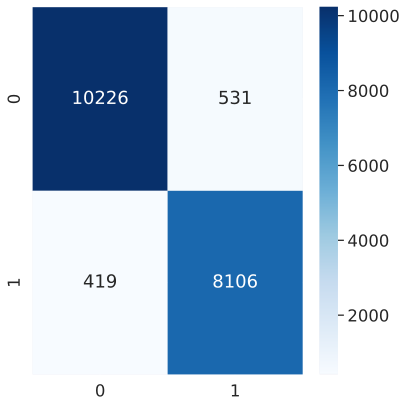

In [65]:
cm_test = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_test))
## visualisasi
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues");

In [66]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
feature_scores

Type Of Booking                   0.393487
Hotel wifi service                0.192744
Common Room entertainment         0.131628
Type of Travel                    0.079945
Stay comfort                      0.048597
Hotel location                    0.033410
Cleanliness                       0.025166
Checkin/Checkout service          0.023767
Other service                     0.020795
Departure/Arrival  convenience    0.012886
Ease of Online booking            0.012678
Age                               0.009913
Food and drink                    0.008957
purpose_of_travel                 0.003183
Gender                            0.002844
dtype: float32

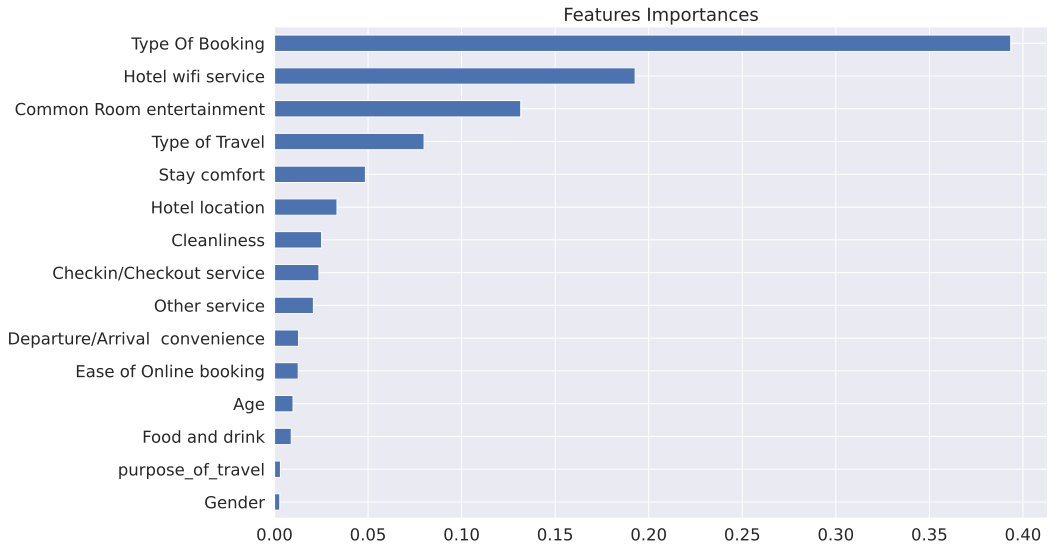

In [67]:
importances = pd.Series(data=model.feature_importances_,
                        index= X_train_scaled.columns)

importances_sorted = importances.sort_values()
plt.figure(figsize=(15,8))
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()